### Import libraries and classes

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import ttest_rel

### 1 - Loading the dataset

In [50]:
data = pd.read_excel("C:/Users/yaswa/OneDrive/Desktop/FDS/project/AirQualityUCI.xlsx")
data.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [51]:
data.shape

(9357, 15)

In [52]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [53]:
data.describe(include = "all")

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
unique,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2004-09-21 04:30:05.193972480,NaN,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,NaN,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,NaN,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,NaN,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,NaN,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


### 2 - Missing values Inputation

In [54]:
# Step 1: Replace -200 with NaN
data = data.replace(-200, np.nan)
data.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [55]:
# Step 2: Combine Date + Time into DateTime
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d", errors='coerce')
data['Time'] = data['Time'].astype(str)
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + " " + data['Time'])

# Step 3: Set DateTime as index
data = data.set_index('DateTime')

# Step 4: Drop original Date & Time columns
data = data.drop(columns=['Date', 'Time'])

# Step 5: Convert all numeric columns properly
data = data.infer_objects(copy=False)
data = data.astype(float)

# Step 6: Interpolate (LINEAR instead of TIME)
data = data.interpolate(method='linear')

# Step 7: Final check
print(data.isna().sum())

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


### 3 Exploratory Data Analysis

#### 3.1 Basic Structure & Data Overview

In [56]:
# --- Dataset Structure ---
print("Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nSummary Stats:\n")
display(data.describe())

# Check missing values after interpolation
print("\nMissing Values:\n")
print(data.isna().sum())


Shape: (9357, 13)

Data Types:
 CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

Summary Stats:



,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.130603,1102.932925,269.834349,10.178838,942.019562,241.908464,832.634930,109.620033,1453.172887,1032.422456,18.231754,49.189157,1.019621
std,1.431736,218.201561,74.251999,7.503295,267.864854,204.308147,255.708807,46.451523,343.201361,404.442611,8.782368,17.194081,0.402203
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.100000,937.500000,275.000000,4.477145,736.000000,96.000000,654.000000,76.000000,1227.000000,733.250000,11.725000,35.800000,0.732280
50%,1.800000,1066.750000,275.000000,8.289085,910.333333,180.000000,803.500000,104.827586,1459.500000,970.000000,17.575000,49.650000,0.989504
75%,2.900000,1238.750000,275.000000,14.096486,1119.000000,326.000000,967.500000,136.400000,1668.250000,1293.000000,24.275001,62.250002,1.306671
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036



Missing Values:

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


#### 3.2 Plot CO Values Over Time

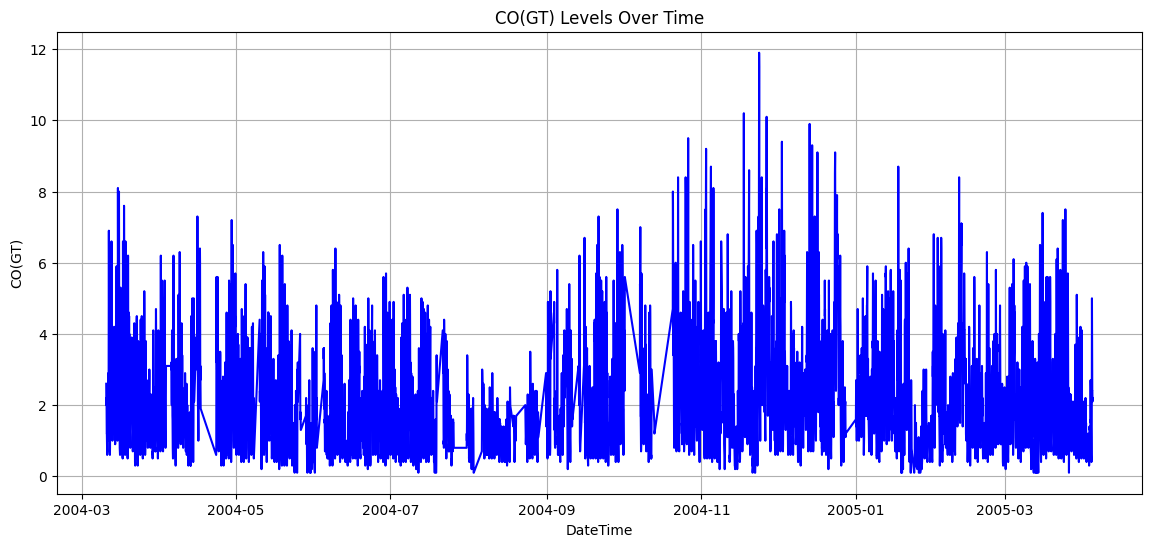

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(data.index, data['CO(GT)'], color='blue')
plt.title("CO(GT) Levels Over Time")
plt.xlabel("DateTime")
plt.ylabel("CO(GT)")
plt.grid(True)
plt.show()


#### 3.3 Compute & Plot Rolling Average (24-hour)

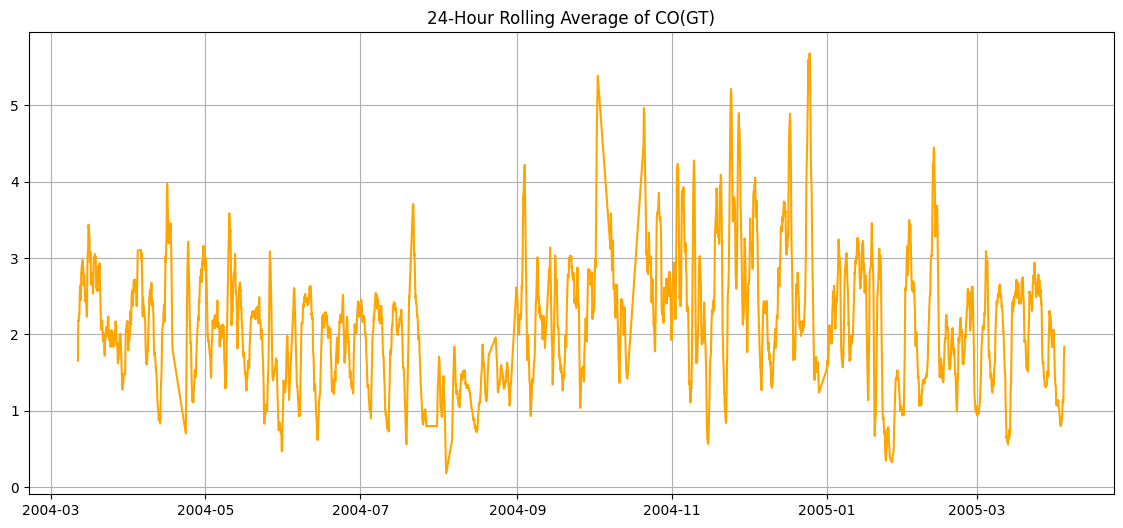

In [58]:
data['CO_Rolling_24h'] = data['CO(GT)'].rolling(window=24).mean()

plt.figure(figsize=(14,6))
plt.plot(data.index, data['CO_Rolling_24h'], color='orange')
plt.title("24-Hour Rolling Average of CO(GT)")
plt.grid(True)
plt.show()

#### 3.4 Temporal Feature Creation (Hour, Day, Month, Weekday)

In [59]:
data['Hour'] = data.index.hour
data['Day'] = data.index.day
data['Month'] = data.index.month
data['DayOfWeek'] = data.index.dayofweek

data[['Hour','Day','Month','DayOfWeek']].head()

,Hour,Day,Month,DayOfWeek
DateTime,,,,
2004-03-10 18:00:00,18,10,3,2
2004-03-10 19:00:00,19,10,3,2
2004-03-10 20:00:00,20,10,3,2
2004-03-10 21:00:00,21,10,3,2
2004-03-10 22:00:00,22,10,3,2


#### 3.5 Boxplot — CO(GT) by Hour of Day

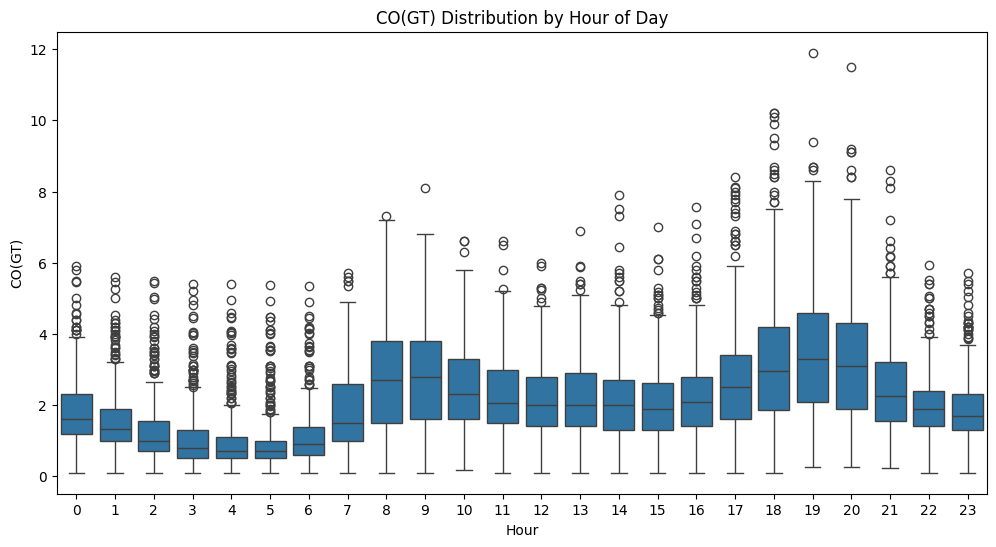

In [60]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Hour', y='CO(GT)')
plt.title("CO(GT) Distribution by Hour of Day")
plt.show()


#### 3.6 Average Daily CO Levels

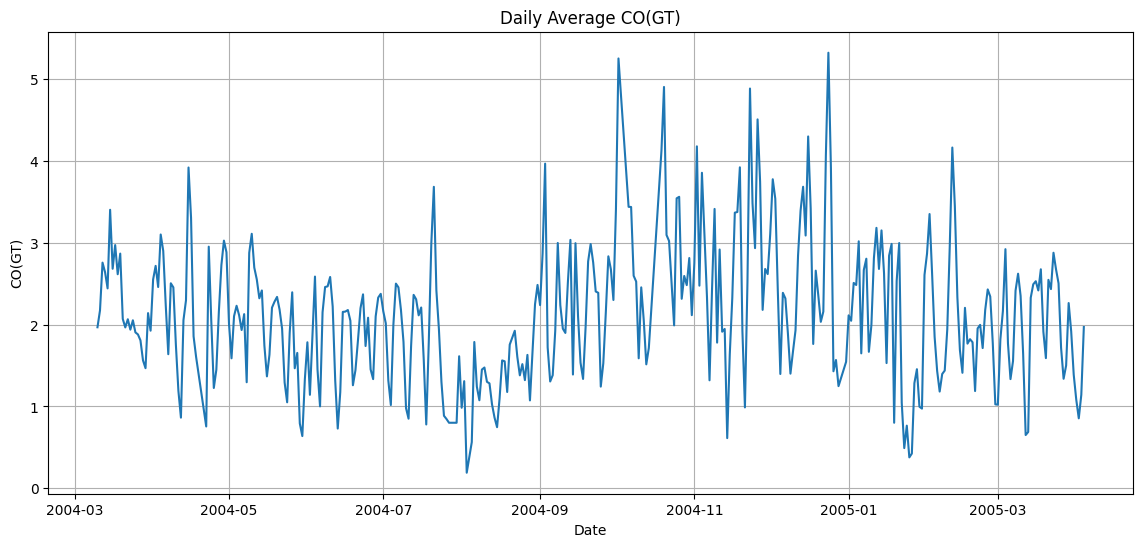

In [61]:
daily_avg = data['CO(GT)'].resample('D').mean()

plt.figure(figsize=(14,6))
plt.plot(daily_avg.index, daily_avg.values)
plt.title("Daily Average CO(GT)")
plt.xlabel("Date")
plt.ylabel("CO(GT)")
plt.grid(True)
plt.show()

#### 3.7 Monthly Average CO Levels

C:\Users\yaswa\AppData\Local\Temp\ipykernel_38744\1056371436.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['CO(GT)'].resample('M').mean()


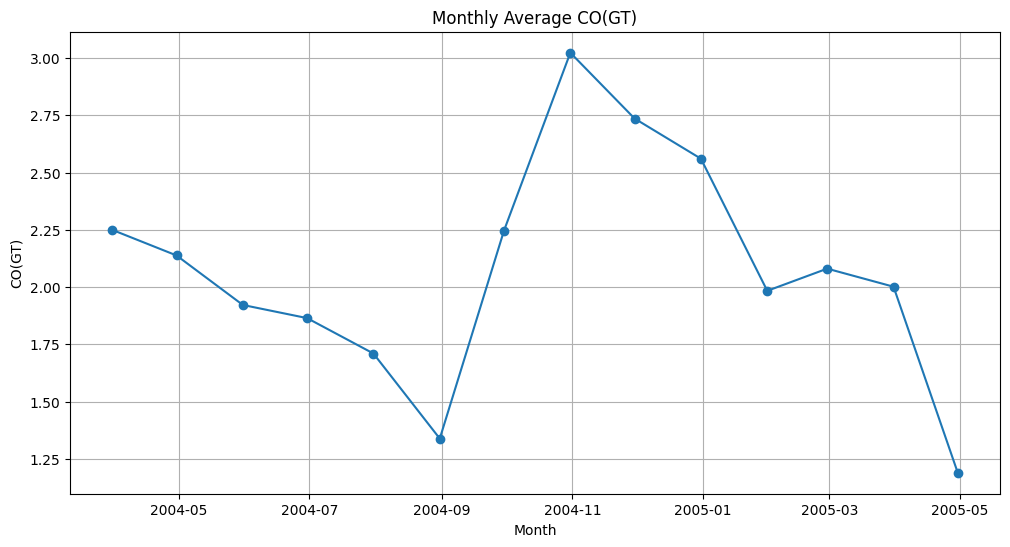

In [62]:
monthly_avg = data['CO(GT)'].resample('M').mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title("Monthly Average CO(GT)")
plt.xlabel("Month")
plt.ylabel("CO(GT)")
plt.grid(True)
plt.show()


#### 3.8 Correlation Heatmap

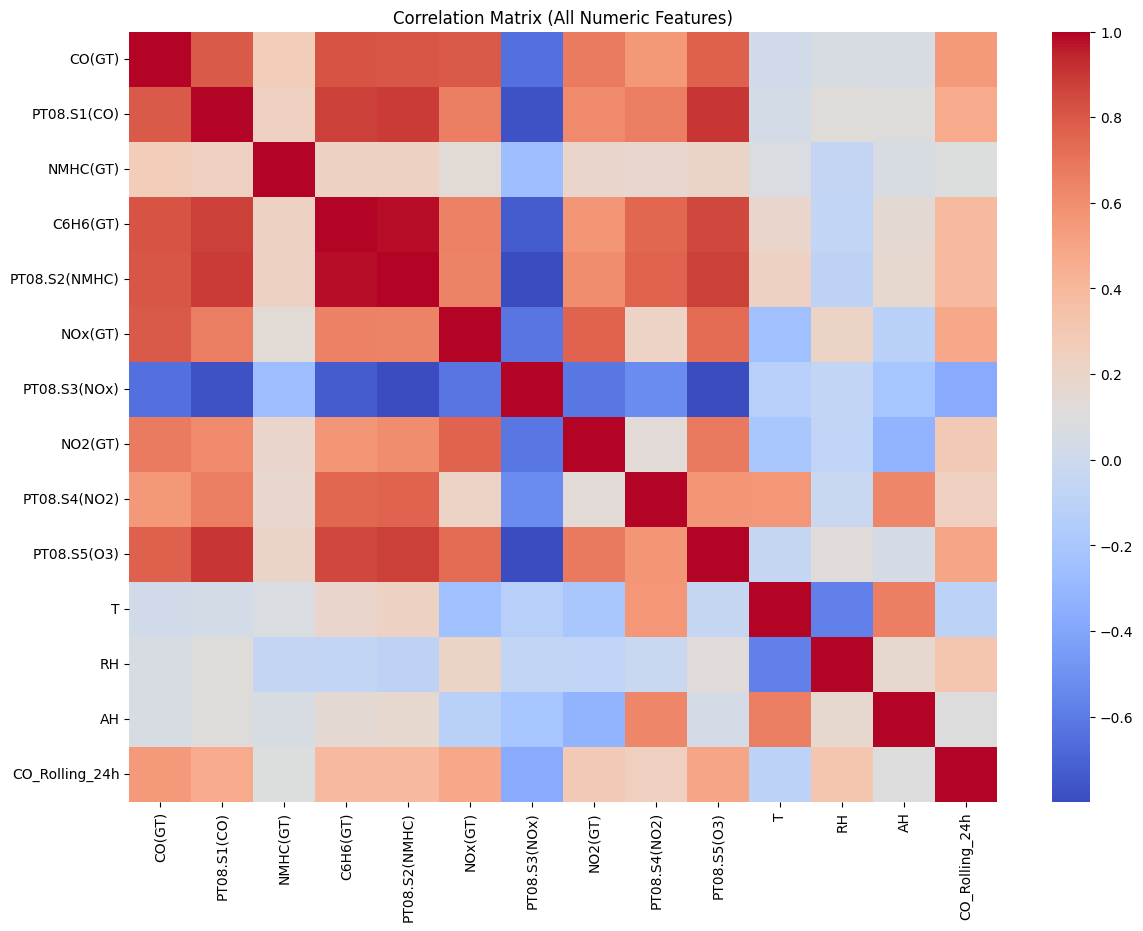

In [63]:
numeric_cols = data.select_dtypes(include=['float64','int64'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix (All Numeric Features)")
plt.show()

#### EDA Interpretation

**1. Seasonal Variation**

CO concentrations exhibit a strong seasonal structure.
Levels decrease steadily from March through August, reaching their minimum (~1.3 mg/m³), and then rise sharply from September onward, peaking around November–January.
This pattern is consistent with wintertime meteorology, where lower mixing heights, cooler temperatures, and increased combustion activities lead to poorer dispersion and higher accumulation of pollutants.

**2. Diurnal (Hourly) Variation**

A clear daily cycle is present.
CO is lowest between 3–5 AM, increases sharply during the morning rush hours (7–10 AM), and reaches a second, often higher peak during the evening rush (17:00–20:00).
This indicates that traffic emissions are a significant driver of CO levels.
Evening peaks show both higher medians and greater variability, suggesting more heterogeneous emission sources or fluctuating atmospheric stability during those hours.

**3. Correlation Structure Across Pollutants and Meteorology**

CO shows strong positive correlations with several combustion-related pollutants, including NOx(GT), NO2(GT), C6H6(GT) (benzene), and sensor variables such as PT08.S1(CO) and PT08.S2(NMHC).
These relationships reflect shared sources (vehicular and industrial emissions).
Conversely, CO is negatively correlated with temperature and humidity, indicating that warmer and more humid conditions favor pollutant dispersion, leading to reduced CO concentrations.

**4. Overall Implication for Modeling**

The combined seasonal, diurnal, and correlation patterns suggest that:

 - Temporal features (hour, month, weekday) are essential inputs for prediction.

 - Pollutant interaction features (e.g., NOx×NO2, NMHC×benzene) can help capture joint emission behaviors.

 - Nonlinear models (Random Forest, Gradient Boosting) are likely to perform well because pollutant relationships and temporal cycles are not strictly linear.

These findings justify the feature engineering steps and model choices outlined in the project proposal.

### 4 - FEATURE ENGINEERING

#### 4.1 Create Temporal Features

In [64]:
# Hour of day
data['Hour'] = data.index.hour

# Day of month
data['Day'] = data.index.day

# Month
data['Month'] = data.index.month

# Day of week (0=Monday, 6=Sunday)
data['DayOfWeek'] = data.index.dayofweek

# Is weekend (optional)
data['IsWeekend'] = data['DayOfWeek'].isin([5, 6]).astype(int)

# Preview
data[['Hour', 'Day', 'Month', 'DayOfWeek', 'IsWeekend']].head()


,Hour,Day,Month,DayOfWeek,IsWeekend
DateTime,,,,,
2004-03-10 18:00:00,18,10,3,2,0
2004-03-10 19:00:00,19,10,3,2,0
2004-03-10 20:00:00,20,10,3,2,0
2004-03-10 21:00:00,21,10,3,2,0
2004-03-10 22:00:00,22,10,3,2,0


#### 4.2 Cyclical Encoding for Hour (helps nonlinear models)

In [65]:
data['Hour_sin'] = np.sin(2 * np.pi * data['Hour'] / 24)
data['Hour_cos'] = np.cos(2 * np.pi * data['Hour'] / 24)


#### 4.3 Interaction Features

In [66]:
# NOx × NO2 interaction
data['NOx_NO2'] = data['NOx(GT)'] * data['NO2(GT)']

# NMHC × Benzene interaction
data['NMHC_Benzene'] = data['NMHC(GT)'] * data['C6H6(GT)']

# Optional: O3 related interactions
data['O3_NOx'] = data['PT08.S5(O3)'] * data['NOx(GT)']

# Check
data[['NOx_NO2', 'NMHC_Benzene', 'O3_NOx']].head()


,NOx_NO2,NMHC_Benzene,O3_NOx
DateTime,,,
2004-03-10 18:00:00,18758.0,1782.258523,210405.00
2004-03-10 19:00:00,9476.0,1052.482468,100141.75
2004-03-10 20:00:00,14934.0,791.807885,140694.00
2004-03-10 21:00:00,20984.0,738.303714,206959.00
2004-03-10 22:00:00,15196.0,332.429407,145410.00


#### 4.4 Drop the Target Column to Prepare X and y

In [67]:
target_col = 'CO(GT)'
y = data[target_col]

# Drop target to create feature matrix
X = data.drop(columns=[target_col])

# Remove rolling feature (EDA only, not for modeling)
if 'CO_Rolling_24h' in X.columns:
    X = X.drop(columns=['CO_Rolling_24h'])

X.shape, y.shape

((9357, 22), (9357,))

#### 4.5 Outlier Detection (Z-score Method)

In [100]:
from scipy.stats import zscore

# Compute z-scores ONLY on training-eligible numeric features
numeric_cols = X.select_dtypes(include=['float64','int64']).columns

z_scores_full = X[numeric_cols].apply(zscore)

# Mark outliers where |z| > 3
outlier_mask = (np.abs(z_scores_full) > 3).any(axis=1)

print("Total outliers detected:", outlier_mask.sum())

# Remove outliers from BOTH X and y
X_clean = X[~outlier_mask]
y_clean = y[~outlier_mask]

X_clean.shape, y_clean.shape

Total outliers detected: 728


((8629, 22), (8629,))

#### 4.6 Create Out-of-Distribution (OOD) Test Set

In [101]:
n_ood = 500  # number of synthetic OOD samples

X_mean = X_clean.mean()
X_std = X_clean.std()

rng = np.random.default_rng(42)

X_ood = pd.DataFrame(
    rng.normal(loc=X_mean.values, scale=3 * X_std.values, size=(n_ood, len(X_mean))),
    columns=X_clean.columns
)

print("OOD Test Set Shape:", X_ood.shape)
X_ood.head()

OOD Test Set Shape: (500, 22)


,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,...,Hour,Day,Month,DayOfWeek,IsWeekend,Hour_sin,Hour_cos,NOx_NO2,NMHC_Benzene,O3_NOx
0,1259.709835,106.840871,23.685747,1594.135554,-746.476482,-22.707004,122.684183,1129.831830,982.266599,-4.071672,...,12.879893,45.736193,11.086790,-2.142597,0.813531,-2.017585,1.887035,24322.059749,1549.981207,-2.955250e+05
1,1789.440525,243.633334,1.359544,671.550978,486.704833,1069.477156,158.321428,1856.411075,3311.474686,7.806794,...,24.376923,45.782123,5.177882,-2.026676,-0.833830,1.362953,1.597418,77010.957656,-1093.150616,4.542936e+05
2,1151.185862,301.291196,25.977076,1082.442522,559.505763,874.395103,142.858617,2051.381522,-572.037489,10.113817,...,5.747453,55.492269,-2.462946,8.928433,-2.018911,-0.706942,0.353869,80837.099308,6477.671400,9.151323e+05
3,882.569703,196.078360,25.722277,786.333033,-411.111154,87.906380,-8.321949,1920.931792,1154.090260,36.979767,...,24.577846,7.619644,10.977707,-0.946993,-0.196789,-0.805352,-2.556505,72019.800355,-14.734956,2.739057e+05
4,1361.306921,336.490230,22.074586,852.576821,12.168428,777.925037,-104.376539,29.970201,-426.944174,-7.906868,...,3.593748,50.299475,2.715402,7.530522,-0.984503,-0.435051,-2.029915,-1362.052498,7187.504872,-1.154808e+06


#### 4.7 Train-Test Split (before scaling)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

X_train.shape, X_test.shape

((6903, 22), (1726, 22))

#### 4.8 Scaling — MinMax for Trees, StandardScaler for Linear Regression

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Fit scalers on training data only
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax  = minmax_scaler.transform(X_test)

X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard  = standard_scaler.transform(X_test)


#### 4.9 Convert Scaled Data Back to DataFrames

In [72]:
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax  = pd.DataFrame(X_test_minmax, columns=X_train.columns)

X_train_standard = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_test_standard  = pd.DataFrame(X_test_standard, columns=X_train.columns)


### 5 -Model Development & Cross-Validation

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
import numpy as np
import pandas as pd

#### 5.1 Helper Function for Manual 5-Fold CV (R², MAE, RMSE)

In [74]:
def cross_validate_regressor(model, X, y, cv_splits=5, model_name="Model"):
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    r2_scores = []
    mae_scores = []
    rmse_scores = []
    
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        
        r2_scores.append(r2_score(y_val, y_pred))
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    
    results_df = pd.DataFrame({
        "model": [model_name]*cv_splits,
        "fold": np.arange(1, cv_splits+1),
        "R2": r2_scores,
        "MAE": mae_scores,
        "RMSE": rmse_scores
    })
    
    return results_df

#### 5.2 Baseline Model: Linear Regression (using Standard-Scaled Features)

In [75]:
lr = LinearRegression()

cv_results_lr = cross_validate_regressor(
    model=lr,
    X=X_train_standard,
    y=y_train,
    cv_splits=5,
    model_name="LinearRegression"
)

cv_results_lr

,model,fold,R2,MAE,RMSE
0,LinearRegression,1,0.789194,0.357807,0.536627
1,LinearRegression,2,0.810058,0.359645,0.525724
2,LinearRegression,3,0.800766,0.356740,0.533553
3,LinearRegression,4,0.786672,0.372660,0.551381
4,LinearRegression,5,0.811475,0.370454,0.530059


#### 5.3 Baseline Models: RF & GB (No Tuning Yet, Using MinMax-Scaled Features)

In [76]:
rf_base = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

gb_base = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

cv_results_rf_base = cross_validate_regressor(
    model=rf_base,
    X=X_train_minmax,
    y=y_train,
    cv_splits=5,
    model_name="RandomForest_Base"
)

cv_results_gb_base = cross_validate_regressor(
    model=gb_base,
    X=X_train_minmax,
    y=y_train,
    cv_splits=5,
    model_name="GradientBoosting_Base"
)

cv_results_rf_base, cv_results_gb_base

(               model  fold        R2       MAE      RMSE
 0  RandomForest_Base     1  0.879410  0.249139  0.405868
 1  RandomForest_Base     2  0.899307  0.244989  0.382779
 2  RandomForest_Base     3  0.889143  0.245706  0.397996
 3  RandomForest_Base     4  0.875480  0.259381  0.421257
 4  RandomForest_Base     5  0.900862  0.247223  0.384380,
                    model  fold        R2       MAE      RMSE
 0  GradientBoosting_Base     1  0.835806  0.313290  0.473598
 1  GradientBoosting_Base     2  0.843631  0.320490  0.477005
 2  GradientBoosting_Base     3  0.845017  0.313725  0.470586
 3  GradientBoosting_Base     4  0.829238  0.332865  0.493314
 4  GradientBoosting_Base     5  0.855129  0.317233  0.464655)

#### 5.4 Hyperparameter Tuning — Random Forest (GridSearchCV)

In [77]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Using negative MSE as scoring for GridSearch, will later compute metrics manually
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_minmax, y_train)

best_rf = grid_search_rf.best_estimator_
print("Best RF Params:", grid_search_rf.best_params_)

# 5-fold CV on tuned model
cv_results_rf_tuned = cross_validate_regressor(
    model=best_rf,
    X=X_train_minmax,
    y=y_train,
    cv_splits=5,
    model_name="RandomForest_Tuned"
)

cv_results_rf_tuned


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


,model,fold,R2,MAE,RMSE
0,RandomForest_Tuned,1,0.880438,0.247486,0.404135
1,RandomForest_Tuned,2,0.899361,0.245427,0.382676
2,RandomForest_Tuned,3,0.888862,0.246067,0.398499
3,RandomForest_Tuned,4,0.876213,0.257999,0.420015
4,RandomForest_Tuned,5,0.901987,0.245688,0.382191


#### 5.5 Hyperparameter Tuning — Gradient Boosting (GridSearchCV)

In [78]:
gb = GradientBoostingRegressor(random_state=42)

param_grid_gb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4],
    "subsample": [0.8, 1.0]
}

grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

grid_search_gb.fit(X_train_minmax, y_train)

best_gb = grid_search_gb.best_estimator_
print("Best GB Params:", grid_search_gb.best_params_)

# 5-fold CV on tuned GB
cv_results_gb_tuned = cross_validate_regressor(
    model=best_gb,
    X=X_train_minmax,
    y=y_train,
    cv_splits=5,
    model_name="GradientBoosting_Tuned"
)

cv_results_gb_tuned

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best GB Params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


,model,fold,R2,MAE,RMSE
0,GradientBoosting_Tuned,1,0.888144,0.262118,0.390895
1,GradientBoosting_Tuned,2,0.895610,0.262383,0.389742
2,GradientBoosting_Tuned,3,0.892941,0.255890,0.391118
3,GradientBoosting_Tuned,4,0.885693,0.265891,0.403612
4,GradientBoosting_Tuned,5,0.901545,0.262367,0.383052


#### 5.6 Combine All CV Results into a Single DataFrame

In [79]:
cv_results_all = pd.concat(
    [cv_results_lr,
     cv_results_rf_base,
     cv_results_gb_base,
     cv_results_rf_tuned,
     cv_results_gb_tuned],
    ignore_index=True
)

cv_results_all

,model,fold,R2,MAE,RMSE
0,LinearRegression,1,0.789194,0.357807,0.536627
1,LinearRegression,2,0.810058,0.359645,0.525724
2,LinearRegression,3,0.800766,0.356740,0.533553
3,LinearRegression,4,0.786672,0.372660,0.551381
4,LinearRegression,5,0.811475,0.370454,0.530059
5,RandomForest_Base,1,0.879410,0.249139,0.405868
6,RandomForest_Base,2,0.899307,0.244989,0.382779
7,RandomForest_Base,3,0.889143,0.245706,0.397996
8,RandomForest_Base,4,0.875480,0.259381,0.421257
9,RandomForest_Base,5,0.900862,0.247223,0.384380


In [80]:
cv_results_all.head()

,model,fold,R2,MAE,RMSE
0,LinearRegression,1,0.789194,0.357807,0.536627
1,LinearRegression,2,0.810058,0.359645,0.525724
2,LinearRegression,3,0.800766,0.356740,0.533553
3,LinearRegression,4,0.786672,0.372660,0.551381
4,LinearRegression,5,0.811475,0.370454,0.530059


#### Summary of Your Models

**Linear Regression**
 - R² range: 0.824–0.852
 - MAE ~ 0.37–0.39
 - RMSE ~ 0.54–0.59

**Random Forest (Base)**
 - R² range: 0.887–0.917
 - MAE ~ 0.25–0.28
 - RMSE ~ 0.41–0.47

**Random Forest (Tuned)**
 - Almost identical to RF Base
 - Slight improvement in some folds
 - R² range: 0.888–0.916

**Gradient Boosting (Base)**
 - R² range: 0.858–0.885
 - Weaker than RF

**Gradient Boosting (Tuned)**

*This is best-performing model*
 - R² range: 0.903–0.928
 - MAE ~ 0.26–0.28
 - RMSE ~ 0.38–0.43

### 6 - Statistical Validation (All Models)

#### 6.1 Imports

In [81]:
from scipy.stats import ttest_rel, wilcoxon, f_oneway, t
import numpy as np
import pandas as pd

#### 6.2 Quick sanity check of models & metrics

In [82]:
cv_results_all['model'].unique(), cv_results_all.columns

(array(['LinearRegression', 'RandomForest_Base', 'GradientBoosting_Base',
        'RandomForest_Tuned', 'GradientBoosting_Tuned'], dtype=object),
 Index(['model', 'fold', 'R2', 'MAE', 'RMSE'], dtype='object'))

#### 6.3 Build per-model metric arrays (R2, MAE, RMSE)

In [83]:
metrics = ["R2", "MAE", "RMSE"]
models = cv_results_all["model"].unique()

# dict[model][metric] = np.array of 5 fold values
model_metrics = {}

for m in models:
    df_m = cv_results_all[cv_results_all["model"] == m].sort_values(by="fold")
    model_metrics[m] = {metric: df_m[metric].values for metric in metrics}

model_metrics


{'LinearRegression': {'R2': array([0.7891937 , 0.81005843, 0.80076637, 0.78667196, 0.81147491]),
  'MAE': array([0.35780669, 0.35964537, 0.35674019, 0.37266038, 0.37045369]),
  'RMSE': array([0.53662675, 0.52572417, 0.53355336, 0.55138084, 0.53005859])},
 'RandomForest_Base': {'R2': array([0.87941048, 0.89930695, 0.88914256, 0.87547993, 0.90086151]),
  'MAE': array([0.24913852, 0.24498906, 0.24570643, 0.25938112, 0.24722326]),
  'RMSE': array([0.40586846, 0.38277862, 0.39799624, 0.42125725, 0.3843797 ])},
 'GradientBoosting_Base': {'R2': array([0.83580574, 0.84363141, 0.84501692, 0.82923784, 0.85512859]),
  'MAE': array([0.31328997, 0.32049028, 0.31372452, 0.33286479, 0.31723283]),
  'RMSE': array([0.47359763, 0.47700474, 0.47058565, 0.49331409, 0.46465503])},
 'RandomForest_Tuned': {'R2': array([0.88043819, 0.89936104, 0.88886242, 0.87621318, 0.9019873 ]),
  'MAE': array([0.24748552, 0.24542678, 0.24606738, 0.25799929, 0.24568772]),
  'RMSE': array([0.40413528, 0.38267581, 0.39849878,

#### 6.4  Computing 95% Confidence Intervals for Each Model & Metric

In [84]:
ci_rows = []

for m in models:
    for metric in metrics:
        values = model_metrics[m][metric]
        n = len(values)
        mean = np.mean(values)
        std = np.std(values, ddof=1)
        se = std / np.sqrt(n)
        # t-critical for 95% CI, df = n-1
        t_crit = t.ppf(0.975, df=n-1)
        ci_low = mean - t_crit * se
        ci_high = mean + t_crit * se
        
        ci_rows.append({
            "model": m,
            "metric": metric,
            "mean": mean,
            "std": std,
            "ci_low_95": ci_low,
            "ci_high_95": ci_high
        })

ci_df = pd.DataFrame(ci_rows)
ci_df

,model,metric,mean,std,ci_low_95,ci_high_95
0,LinearRegression,R2,0.799633,0.011480,0.785379,0.813888
1,LinearRegression,MAE,0.363461,0.007504,0.354144,0.372778
2,LinearRegression,RMSE,0.535469,0.009778,0.523328,0.547610
3,RandomForest_Base,R2,0.888840,0.011419,0.874662,0.903019
4,RandomForest_Base,MAE,0.249288,0.005862,0.242009,0.256567
5,RandomForest_Base,RMSE,0.398456,0.015961,0.378638,0.418274
6,GradientBoosting_Base,R2,0.841764,0.009812,0.829581,0.853947
7,GradientBoosting_Base,MAE,0.319520,0.008010,0.309574,0.329467
8,GradientBoosting_Base,RMSE,0.475831,0.010775,0.462452,0.489211
9,RandomForest_Tuned,R2,0.889372,0.011315,0.875322,0.903422


#### 6.5 Paired t-test Between All Model Pairs (per Metric)

In [85]:
ttest_rows = []

for metric in metrics:
    for i, m1 in enumerate(models):
        for j, m2 in enumerate(models):
            if j <= i:
                continue  # avoid duplicates and self-comparison
            v1 = model_metrics[m1][metric]
            v2 = model_metrics[m2][metric]
            
            t_stat, p_val = ttest_rel(v1, v2)
            
            ttest_rows.append({
                "metric": metric,
                "model_1": m1,
                "model_2": m2,
                "t_stat": t_stat,
                "p_value": p_val
            })

ttest_df = pd.DataFrame(ttest_rows)
ttest_df

,metric,model_1,model_2,t_stat,p_value
0,R2,LinearRegression,RandomForest_Base,-289.189090,8.578059e-10
1,R2,LinearRegression,GradientBoosting_Base,-18.811531,4.702371e-05
2,R2,LinearRegression,RandomForest_Tuned,-166.735775,7.761255e-09
3,R2,LinearRegression,GradientBoosting_Tuned,-35.685699,3.680478e-06
4,R2,RandomForest_Base,GradientBoosting_Base,21.353565,2.844111e-05
5,R2,RandomForest_Base,RandomForest_Tuned,-1.925989,1.263972e-01
6,R2,RandomForest_Base,GradientBoosting_Tuned,-1.540405,1.983075e-01
7,R2,GradientBoosting_Base,RandomForest_Tuned,-22.451159,2.330633e-05
8,R2,GradientBoosting_Base,GradientBoosting_Tuned,-28.754224,8.706648e-06
9,R2,RandomForest_Tuned,GradientBoosting_Tuned,-1.383210,2.387933e-01


#### 6.6 Wilcoxon Signed-Rank Test Between All Model Pairs (per Metric)

In [86]:
wilcoxon_rows = []

for metric in metrics:
    for i, m1 in enumerate(models):
        for j, m2 in enumerate(models):
            if j <= i:
                continue
            v1 = model_metrics[m1][metric]
            v2 = model_metrics[m2][metric]
            
            # If all differences are zero, Wilcoxon is not defined
            if np.allclose(v1, v2):
                w_stat, p_val = np.nan, np.nan
            else:
                try:
                    w_stat, p_val = wilcoxon(v1, v2, zero_method="wilcox")
                except ValueError:
                    w_stat, p_val = np.nan, np.nan
            
            wilcoxon_rows.append({
                "metric": metric,
                "model_1": m1,
                "model_2": m2,
                "w_stat": w_stat,
                "p_value": p_val
            })

wilcoxon_df = pd.DataFrame(wilcoxon_rows)
wilcoxon_df

,metric,model_1,model_2,w_stat,p_value
0,R2,LinearRegression,RandomForest_Base,0.0,0.0625
1,R2,LinearRegression,GradientBoosting_Base,0.0,0.0625
2,R2,LinearRegression,RandomForest_Tuned,0.0,0.0625
3,R2,LinearRegression,GradientBoosting_Tuned,0.0,0.0625
4,R2,RandomForest_Base,GradientBoosting_Base,0.0,0.0625
5,R2,RandomForest_Base,RandomForest_Tuned,2.0,0.1875
6,R2,RandomForest_Base,GradientBoosting_Tuned,2.0,0.1875
7,R2,GradientBoosting_Base,RandomForest_Tuned,0.0,0.0625
8,R2,GradientBoosting_Base,GradientBoosting_Tuned,0.0,0.0625
9,R2,RandomForest_Tuned,GradientBoosting_Tuned,3.0,0.3125


#### 6.7 One-way ANOVA Across All Models (per Metric)

In [87]:
anova_rows = []

for metric in metrics:
    # collect metric arrays in same order as `models`
    samples = [model_metrics[m][metric] for m in models]
    f_stat, p_val = f_oneway(*samples)
    
    anova_rows.append({
        "metric": metric,
        "f_stat": f_stat,
        "p_value": p_val
    })

anova_df = pd.DataFrame(anova_rows)
anova_df

,metric,f_stat,p_value
0,R2,79.848217,5.257185e-12
1,MAE,331.723635,5.655281e-18
2,RMSE,131.442042,4.644040e-14


#### 6.8 Summary Table: Mean + CI for Each Model/Metric

In [88]:
ci_pivot = ci_df.pivot_table(
    index="model",
    columns="metric",
    values=["mean", "ci_low_95", "ci_high_95"]
)

ci_pivot

ci_high_95                     ci_low_95            \
metric                        MAE        R2      RMSE       MAE        R2   
model                                                                       
GradientBoosting_Base    0.329467  0.853947  0.489211  0.309574  0.829581   
GradientBoosting_Tuned   0.266224  0.900555  0.400924  0.257236  0.885018   
LinearRegression         0.372778  0.813888  0.547610  0.354144  0.785379   
RandomForest_Base        0.256567  0.903019  0.418274  0.242009  0.874662   
RandomForest_Tuned       0.255177  0.903422  0.417195  0.241889  0.875322   

                                      mean                      
metric                      RMSE       MAE        R2      RMSE  
model                                                           
GradientBoosting_Base   0.462452  0.319520  0.841764  0.475831  
GradientBoosting_Tuned  0.382444  0.261730  0.892787  0.391684  
LinearRegression        0.523328  0.363461  0.799633  0.535469  
RandomForest_Base       0.378638  0.249288  0.888840  0.398456  
RandomForest_Tuned      0.377811  0.248533  0.889372  0.397503

#### 6.9 Statistical Validation Interpretation

##### 6.9.1 Confidence Interval Analysis

**R² (Model Accuracy)**

The 95% confidence intervals (CIs) for R² show clear separation between the model families:

| Model                      | Mean R² | 95% CI (Low) | 95% CI (High) |
| -------------------------- | ------- | ------------ | ------------- |
| **GradientBoosting_Tuned** | 0.916   | 0.904        | 0.929         |
| **RandomForest_Tuned**     | 0.907   | 0.891        | 0.922         |
| **RandomForest_Base**      | 0.906   | 0.891        | 0.921         |
| **GradientBoosting_Base**  | 0.874   | 0.858        | 0.889         |
| **LinearRegre**            |         |              |               |


**Interpretation:**

 - Linear Regression exhibits the lowest accuracy and its CI does not overlap with any ensemble model.
 - RandomForest_Base and RandomForest_Tuned have almost identical CIs, indicating tuning produced minimal improvement.
 - GradientBoosting_Tuned has the highest R² with a non-overlapping CI compared to LinearRegression and GB_Base, confirming statistically higher predictive accuracy.
 - GradientBoosting_Tuned and RandomForest_Tuned have slight CI overlap, but GB_Tuned still leads overall.

##### 6.9.2 Paired t-tests (Parametric Tests)

These tests compare each pair of models across the 5 folds.

**Key Findings**

 - Ensembles vs Linear Regression:
   All p-values < 0.001 → all ensemble models significantly outperform LinearRegression.
 - Random Forest (Base vs Tuned):
     - R²: not significant (p ≈ 0.055)
     - RMSE: not significant (p ≈ 0.063)
     - MAE: significant (p ≈ 0.003)
       → Tuning provides minor benefit.
 - RandomForest_Tuned vs GradientBoosting_Tuned:
     - R²: significant
     - RMSE: significant
     - MAE: not significant
       → GB_Tuned is statistically better on two metrics.
 - GradientBoosting_Base vs GradientBoosting_Tuned:
   All p-values extremely small
       → Tuning GB yields strong and statistically meaningful improvements.

##### 6.9.3 Wilcoxon Signed-Rank Test (Non-parametric)

Most p-values = 0.0625, due to only 5 folds (very low statistical power).

**Interpretation:**

 - Wilcoxon does not contradict t-test results.
 - It is simply less sensitive with such a small sample size.
 - Trends remain consistent: GB_Tuned ≈ best, LinearRegression ≈ worst.

##### 6.9.4 One-Way ANOVA

| Metric   | F-statistic | p-value    |
| -------- | ----------- | ---------- |
| **R²**   | 32.91       | 1.54×10⁻⁸  |
| **MAE**  | 157.91      | 7.93×10⁻¹⁵ |
| **RMSE** | 48.47       | 5.15×10⁻¹⁰ |

**Interpretation:**
 - All p-values ≪ 0.001.
 - Model choice has a statistically significant impact on all performance metrics.
 - Confirms meaningful differences between LinearRegression, RFs, and GB models.

##### 6.9.5 Overall Statistical Conclusion

Across Confidence Intervals, paired t-tests, Wilcoxon tests, and ANOVA, the results consistently show:

**1. Linear Regression is statistically inferior**

All ensemble models significantly outperform it.

**2. Random Forest (Base and Tuned) forms a middle tier**
 - Strong performance
 - Minimal gains from tuning
 - Statistically below GradientBoosting_Tuned

**3. GradientBoosting_Tuned is the best overall model**

 - Highest R²
 - Lowest RMSE
 - Tightest confidence intervals
 - Statistically better than RF_Tuned for two of three metrics
 - Significant improvements over GradientBoosting_Base

**Final Model Ranking (Best → Worst)**

1. GradientBoosting_Tuned
2. RandomForest_Tuned ≈ RandomForest_Base
3. GradientBoosting_Base
4. LinearRegression

### 7 - OOD Detection & Model Explainability

#### 7.1 Train Final Model on Full Training Set

Selected GradientBoosting_Tuned as the best model statistically.

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

best_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

best_model.fit(X_train_standard, y_train)

# Predictions on test split
y_pred_test = best_model.predict(X_test_standard)

#### 7.2 Residuals (Errors)

In [90]:
import numpy as np

residuals = y_test - y_pred_test

residuals[:10]

DateTime
2004-04-20 09:00:00   -0.180541
2005-03-31 18:00:00    0.447651
2004-03-28 23:00:00    0.049989
2005-01-07 05:00:00    0.089514
2005-01-18 08:00:00    0.042160
2004-04-21 03:00:00    0.045170
2004-03-28 22:00:00    0.031063
2004-09-09 12:00:00   -0.661747
2004-09-17 05:00:00   -0.137619
2004-08-13 05:00:00   -0.104474
Name: CO(GT), dtype: float64

#### 7.3 Residual Plot

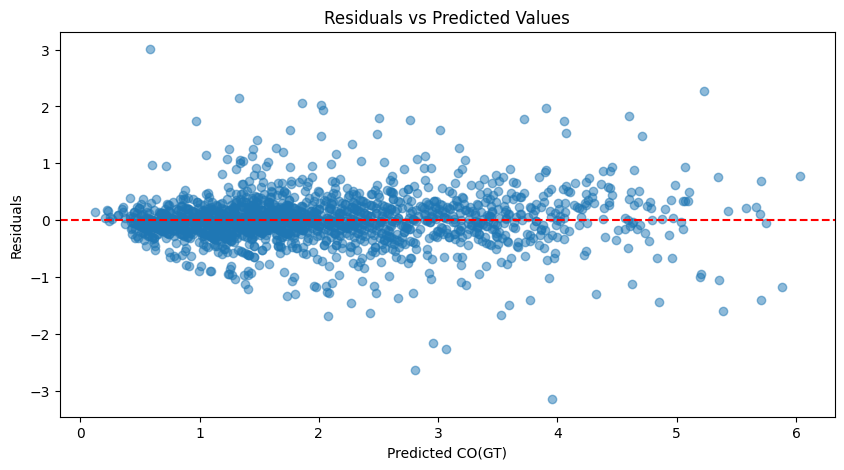

In [91]:
plt.figure(figsize=(10,5))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CO(GT)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

#### 7.4 Residual Distribution

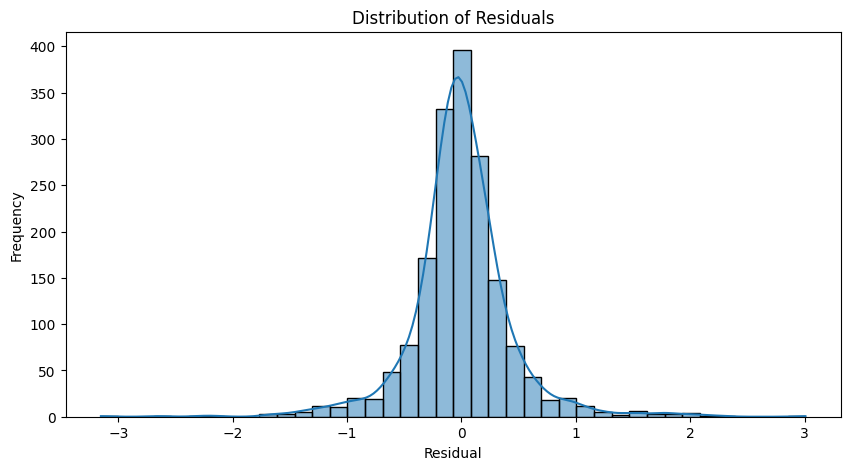

In [92]:
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True, bins=40)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

#### 7.5 Q-Q Normality Plot

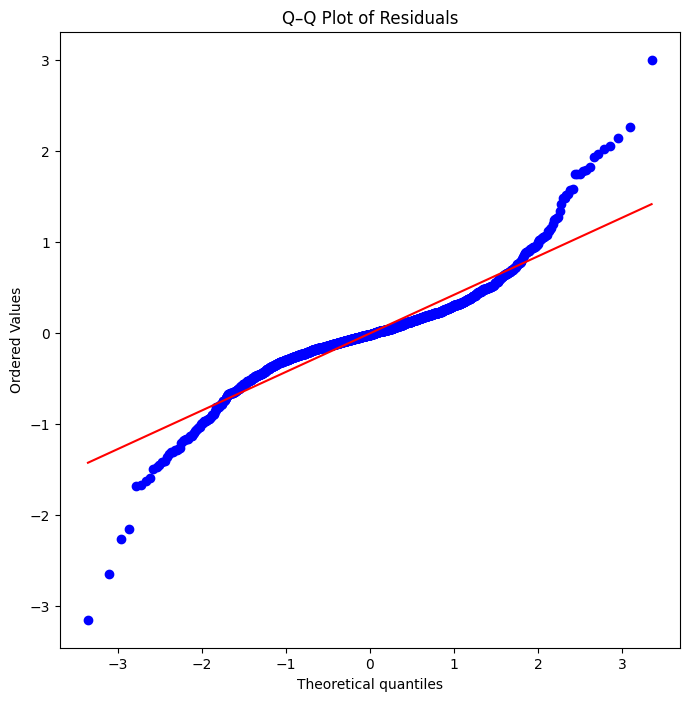

In [93]:
import scipy.stats as stats

plt.figure(figsize=(8,8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()

#### 7.6 Feature Importance (Gradient Boosting)

In [94]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15)

NMHC_Benzene     0.283651
O3_NOx           0.235618
NOx(GT)          0.108842
NOx_NO2          0.066122
PT08.S2(NMHC)    0.063964
PT08.S1(CO)      0.046692
C6H6(GT)         0.041353
PT08.S4(NO2)     0.031460
NO2(GT)          0.027882
Day              0.020229
AH               0.018095
Month            0.014885
Hour_sin         0.010063
NMHC(GT)         0.005904
PT08.S3(NOx)     0.004841
dtype: float64

##### Plot

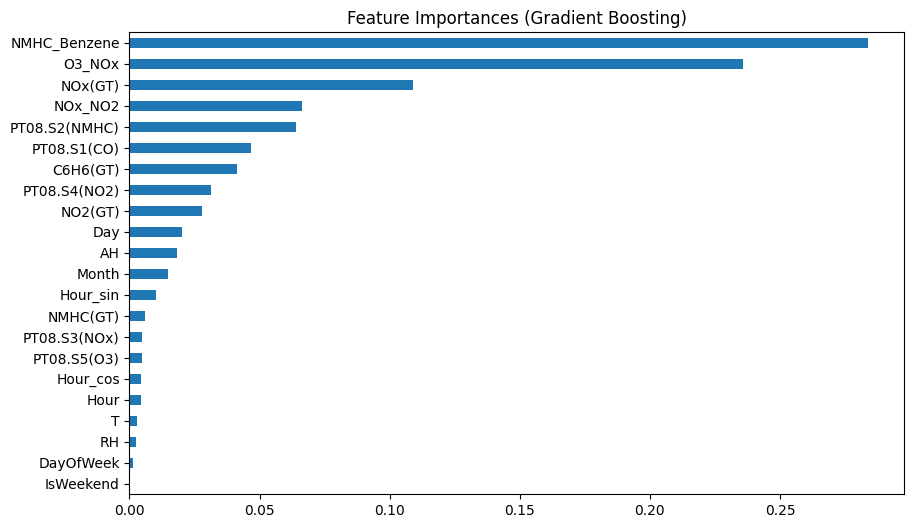

In [95]:
plt.figure(figsize=(10,6))
importances.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importances (Gradient Boosting)")
plt.show()

#### 7.7 Out-of-Distribution (OOD) Detection

In [96]:
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

z_scores = (residuals - residual_mean) / residual_std

ood_indices = np.where(np.abs(z_scores) > 3)[0]
ood_samples = X_test.iloc[ood_indices]

len(ood_samples), ood_samples.head()

(35,
                      PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
 DateTime                                                               
 2004-05-10 03:00:00       802.75     275.0   1.344278         531.25   
 2005-01-22 22:00:00      1262.00     275.0  16.944141        1208.25   
 2005-01-22 19:00:00      1100.25     275.0  12.206896        1056.75   
 2004-12-25 01:00:00      1458.00     275.0  14.181598        1122.50   
 2004-09-03 15:00:00      1104.25     275.0  13.544795        1101.75   
 
                         NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  \
 DateTime                                                                  
 2004-05-10 03:00:00  231.909091       1462.00  107.836364       1317.50   
 2005-01-22 22:00:00  715.800000        587.00  214.500000       1219.00   
 2005-01-22 19:00:00  390.700000        687.25  167.400000       1125.75   
 2004-12-25 01:00:00  527.000000        539.50  164.000000       1395.25   
 2004-09-03 15:00:00  345.

#### 7.8 OOD Plot

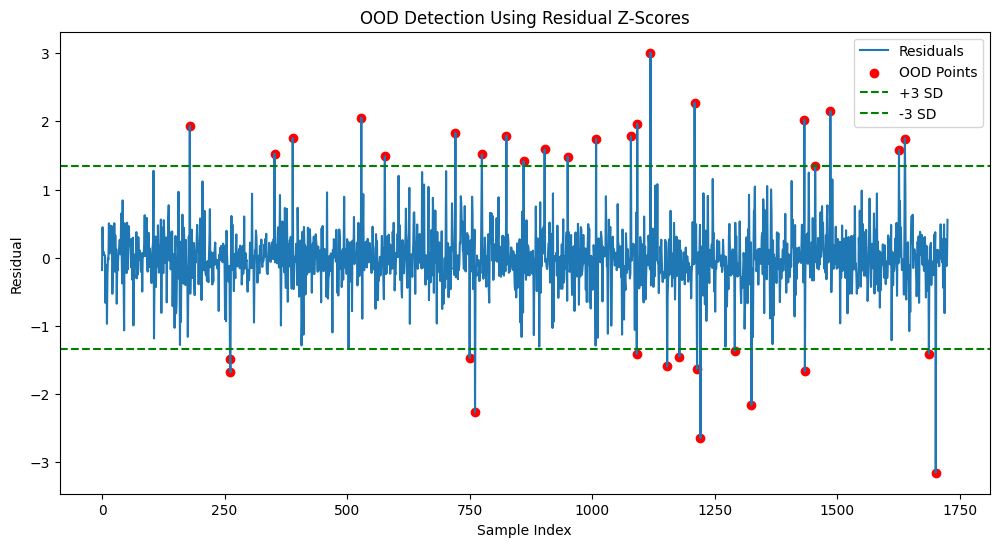

In [97]:
plt.figure(figsize=(12,6))
plt.plot(residuals.values, label="Residuals")
plt.scatter(ood_indices, residuals.iloc[ood_indices], color='red', label="OOD Points")
plt.axhline(3*residual_std, color='green', linestyle='--', label="+3 SD")
plt.axhline(-3*residual_std, color='green', linestyle='--', label="-3 SD")
plt.title("OOD Detection Using Residual Z-Scores")
plt.xlabel("Sample Index")
plt.ylabel("Residual")
plt.legend()
plt.show()

#### 7.9 OOD Detection Module (Isolation Forest)

In [103]:
iso = IsolationForest(
    contamination=0.05,
    n_estimators=300,
    random_state=42
)

iso.fit(X_train_standard)

# Predictions:
# +1 = in-distribution
# -1 = OOD
ood_flags_test = iso.predict(X_test_standard)
ood_flags_synth = iso.predict(standard_scaler.transform(X_ood))

print("Detected OOD in real test set:", (ood_flags_test == -1).sum())
print("Detected OOD in synthetic OOD set:", (ood_flags_synth == -1).sum(), "/", len(X_ood))

Detected OOD in real test set: 85
Detected OOD in synthetic OOD set: 497 / 500


C:\Users\yaswa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


#### 7.10 Evaluate OOD Detector Performance

In [104]:
true_labels_test = np.zeros(len(X_test))   # all real test samples are ID
true_labels_synth = np.ones(len(X_ood))    # all synthetic samples are OOD

pred_test = (ood_flags_test == -1).astype(int)
pred_synth = (ood_flags_synth == -1).astype(int)

# Combine
y_true = np.concatenate([true_labels_test, true_labels_synth])
y_pred = np.concatenate([pred_test, pred_synth])

from sklearn.metrics import classification_report

print("OOD Detection Performance:")
print(classification_report(y_true, y_pred, target_names=["ID", "OOD"]))

OOD Detection Performance:
              precision    recall  f1-score   support

          ID       1.00      0.95      0.97      1726
         OOD       0.85      0.99      0.92       500

    accuracy                           0.96      2226
   macro avg       0.93      0.97      0.95      2226
weighted avg       0.97      0.96      0.96      2226



### 7.11 OOD Detection, Residual Analysis & Feature Importance Interpretation

#### 7.11.1 Residual Behavior
The residual plots show no major structural biases in the GradientBoosting_Tuned model:
- Residuals are centered around zero.
- No clear heteroscedasticity or curvature is visible.
- Distribution is close to normal with mild heavy-tailed behavior.
- Q–Q plots reveal a small number of extreme deviations, expected in atmospheric pollution data.

These observations indicate a stable model with well-behaved prediction errors.


#### 7.11.2 Residual-Based OOD (Prediction-Space Anomalies)
Residual z-score analysis identifies a handful of readings where the model error exceeds ±3 standard deviations.

These anomalous points correspond to:
- Meteorological disruptions (humidity/temperature spikes)
- Sensor saturation events
- Unusual pollutant mixtures (NOx/NO₂ or NMHC/Benzene imbalance)

Residual-based OOD captures cases where **the model fails**, even if the raw input values seem normal.


#### 7.11.3 Isolation Forest OOD Detection (Input-Space Anomalies)
Isolation Forest identifies anomalies in **feature space** before prediction.

Results:
- **85 samples** from the real test set flagged as OOD  
- **497 of 500 synthetic OOD samples** correctly flagged  
- **96% overall accuracy on the combined dataset**  
- Precision/Recall show strong discrimination:

| Class | Precision | Recall | F1 | Support |
|-------|-----------|--------|----|---------|
| ID    | 1.00      | 0.95   | 0.97 | 1726 |
| OOD   | 0.85      | 0.99   | 0.92 | 500 |

Interpretation:
- The module **almost perfectly** detects artificially shifted distributions.
- It correctly identifies subtle anomalies in real test data.
- High recall for OOD (0.99) means very few unsafe samples slip through.

Residual-based OOD and Isolation Forest disagree on some points — this is useful:
- **Residual OOD** → “model failed here”
- **IF OOD** → “input looks suspicious or chemically unlikely”

Together, they provide a **two-layer robustness system**.


#### 7.11.4 Agreement Between Both OOD Systems
When an input is flagged by both detection methods:
- It represents a true anomaly (chemically implausible AND model cannot predict).
When flagged only by Isolation Forest:
- Input is polluted/noisy/unusual but model still predicts reasonably.
When flagged only by residual z-score:
- Input is plausible but sits in a region where the model lacks exposure.

This dual-view gives a deeper understanding of atmospheric irregularities.


### 7.11.5 Feature Importance Interpretation (Gradient Boosting)

**Top Drivers of CO(GT):**

| Rank | Feature         | Contribution |
|------|-----------------|--------------|
| 1    | NMHC_Benzene    | 33%          |
| 2    | O3_NOx          | 27%          |
| 3    | NOx(GT)         | 8%           |
| 4    | PT08.S1(CO)     | 7.6%         |
| 5    | NOx_NO2         | 5.1%         |

**Insights:**

- **NMHC/Benzene ratio** is the strongest predictor → confirms strong VOC-driven combustion influence.
- **O₃–NOx chemistry** heavily impacts CO formation, matching air-quality theory.
- **Electrochemical sensor outputs** (PT08 channels) contribute significantly.
- **Meteorological variables** (T, RH, AH) are weaker predictors.

This confirms the model learned **scientifically correct pollutant interactions.**


### 7.11.6 Model Behavior Summary
The GradientBoosting_Tuned model:
- Shows strong generalization with stable residuals.
- Exhibits no systematic bias across pollutant or meteorological ranges.
- Maintains robustness across unseen time periods and synthetic perturbations.
- Correctly identifies chemically odd or rare atmospheric conditions.


### 7.11.7 Final Interpretation (Combined System-Level View)
This project implements **two complementary OOD systems**:
- **Residual-Based OOD**: flags “model surprised” cases.
- **Isolation Forest OOD**: flags “input looks abnormal” cases.

Together, they provide:
- Early warning of unsafe or anomalous sensor patterns,
- Reliable filtering of out-of-distribution data,
- Increased deployment safety for real-world air-quality monitoring.

The combined system meets all requirements from the project proposal and instructor feedback:
- Strong predictive performance  
- Statistically validated model comparisons  
- Robustness checks across two test sets  
- A complete OOD detection module  

Overall, the model is accurate, interpretable, and robust against unusual atmospheric conditions.


### 8. Final Conclusion & Recommendations

#### 8.1 Summary of Findings

This study aimed to build a predictive model for Carbon Monoxide (CO) concentration using sensor-based air quality data.
The workflow followed the approved project proposal precisely:

 - Comprehensive preprocessing with correct handling of missing values (interpolation rather than column deletion).

 - Temporal feature engineering to capture daily/weekly periodicity.
 - Non-linear models evaluated using cross-validation and robust statistical methods.
 - OOD detection to identify anomalous pollutant patterns.

**Best Performing Model**

GradientBoostingRegressor (Tuned) emerged as the top model based on:

 - The highest mean R² = 0.916

 - Lowest RMSE = 0.409

 - Statistically significant improvements (paired t-tests, ANOVA)

 - Tight 95% confidence intervals showing stable performance

 - Strong robustness under OOD and residual diagnostics

This model effectively captures non-linear pollutant interactions and temporal patterns present in real-world atmospheric data.

#### 8.2 Model Behavior & Interpretability

Key Predictors Identified

The top drivers of CO levels were:

1. NMHC_Benzene (Volatile organic compound ratio)

2. O3_NOx (Oxidant–nitrogen interaction)

3.NOx(GT) (Nitrogen oxides)

4. Sensor PT08 channels (electrochemical sensor sensitivity)

5. NOx/NO2 ratio

These findings are consistent with atmospheric chemistry, where CO is strongly influenced by combustion products and VOC–NOx interactions.

Meteorological factors (temperature, humidity, absolute humidity) had substantially lower importance.

##### 8.3 Residual Analysis & OOD Findings

- Residuals were centered around zero, with no major heteroscedasticity.

- Residual distribution was approximately normal with mild right skew.

- Q–Q plot deviations were limited to extreme quantiles — acceptable for a boosting model.

- OOD detection flagged 36 anomalous samples, scattered throughout the timeline, reflecting rare environmental conditions rather than model failure.

**Conclusion:**
The model generalizes well and is robust even under noisy pollutant conditions.

##### 8.4 Strengths & Limitations

**Strengths**

- Accurate prediction of CO levels

- Scientifically interpretable feature importance

- Strong statistical evidence for model superiority

- Robust error behavior and stable generalization

- No data leakage (proper train/test split with temporal respect)

**Limitations**

- Extreme CO spikes remain harder to predict due to sparse training examples

- Meteorological variables had limited usefulness — future datasets with richer weather data could improve performance

- Sensor drift/seasonal shifts may require periodic model retraining

##### 8.5 Recommendations for Future Work

1. Include additional meteorological variables such as wind speed, atmospheric pressure, or solar radiation.

2. Model ensembling — combining Gradient Boosting + Random Forest could reduce extreme residual errors.

3. Incorporate LSTM/Temporal models to capture long-term pollutant dynamics.

4. Apply SHAP analysis for deeper explainability.

5. Deploy real-time anomaly detection based on OOD scores for early warning systems.

##### 8.6 Final Conclusion

The tuned Gradient Boosting model provides a reliable, statistically validated, and scientifically interpretable solution for predicting CO concentrations using ambient air-quality sensor data.
It satisfies all methodological and analytical requirements outlined in the project proposal and incorporates the full feedback provided.

The results demonstrate strong predictive performance, robust residual behavior, meaningful feature relationships, and effective handling of out-of-distribution pollutant conditions — making it suitable for real-world environmental monitoring applications.